In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

**10. This question should be answered using the Carseats data set.**

**(a) Fit a multiple regression model to predict Sales using Price ,
Urban , and US .**

In [2]:
Carseats = pd.read_csv("data/Carseats.csv")
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
Carseats.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
results_Carseats_test = smf.ols('Sales ~ Price + Urban + US',data = Carseats).fit()
results_Carseats_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           2.39e-23
Time:                        22:50:54   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!**

In [5]:
import patsy
patsy.dmatrix('Urban + US',Carseats).design_info

DesignInfo(['Intercept', 'Urban[T.Yes]', 'US[T.Yes]'],
           factor_infos={EvalFactor('Urban'): FactorInfo(factor=EvalFactor('Urban'),
                                    type='categorical',
                                    state=<factor state>,
                                    categories=('No', 'Yes')),
                         EvalFactor('US'): FactorInfo(factor=EvalFactor('US'),
                                    type='categorical',
                                    state=<factor state>,
                                    categories=('No', 'Yes'))},
           term_codings=OrderedDict([(Term([]),
                                      [SubtermInfo(factors=(),
                                                   contrast_matrices={},
                                                   num_columns=1)]),
                                     (Term([EvalFactor('Urban')]),
                                      [SubtermInfo(factors=(EvalFactor('Urban'),),
                       

In [6]:
contrasts_modle = patsy.dmatrix('Urban + US',Carseats).design_info
contrasts_term = contrasts_modle.terms[1]
contrasts_EvalFactor = contrasts_term.factors[0]
contrasts_index = contrasts_modle.factor_infos[contrasts_EvalFactor].categories
contrasts_columns = contrasts_modle.term_codings[contrasts_term][0].contrast_matrices[contrasts_EvalFactor].column_suffixes
contrasts_array = contrasts_modle.term_codings[contrasts_term][0].contrast_matrices[contrasts_EvalFactor].matrix
contrasts = pd.DataFrame(contrasts_array,index = contrasts_index,columns = contrasts_columns)
contrasts

,[T.Yes]
No,0.0
Yes,1.0


结合以上可见Urban[T.Yes]、US[T.Yes]代表Urban/US各自取值'Yes',与summary()对比可知Urban负相关，但US正相关，但Urban无法拒绝0假设

**(c) Write out the model in equation form, being careful to handle
the qualitative variables properly.**

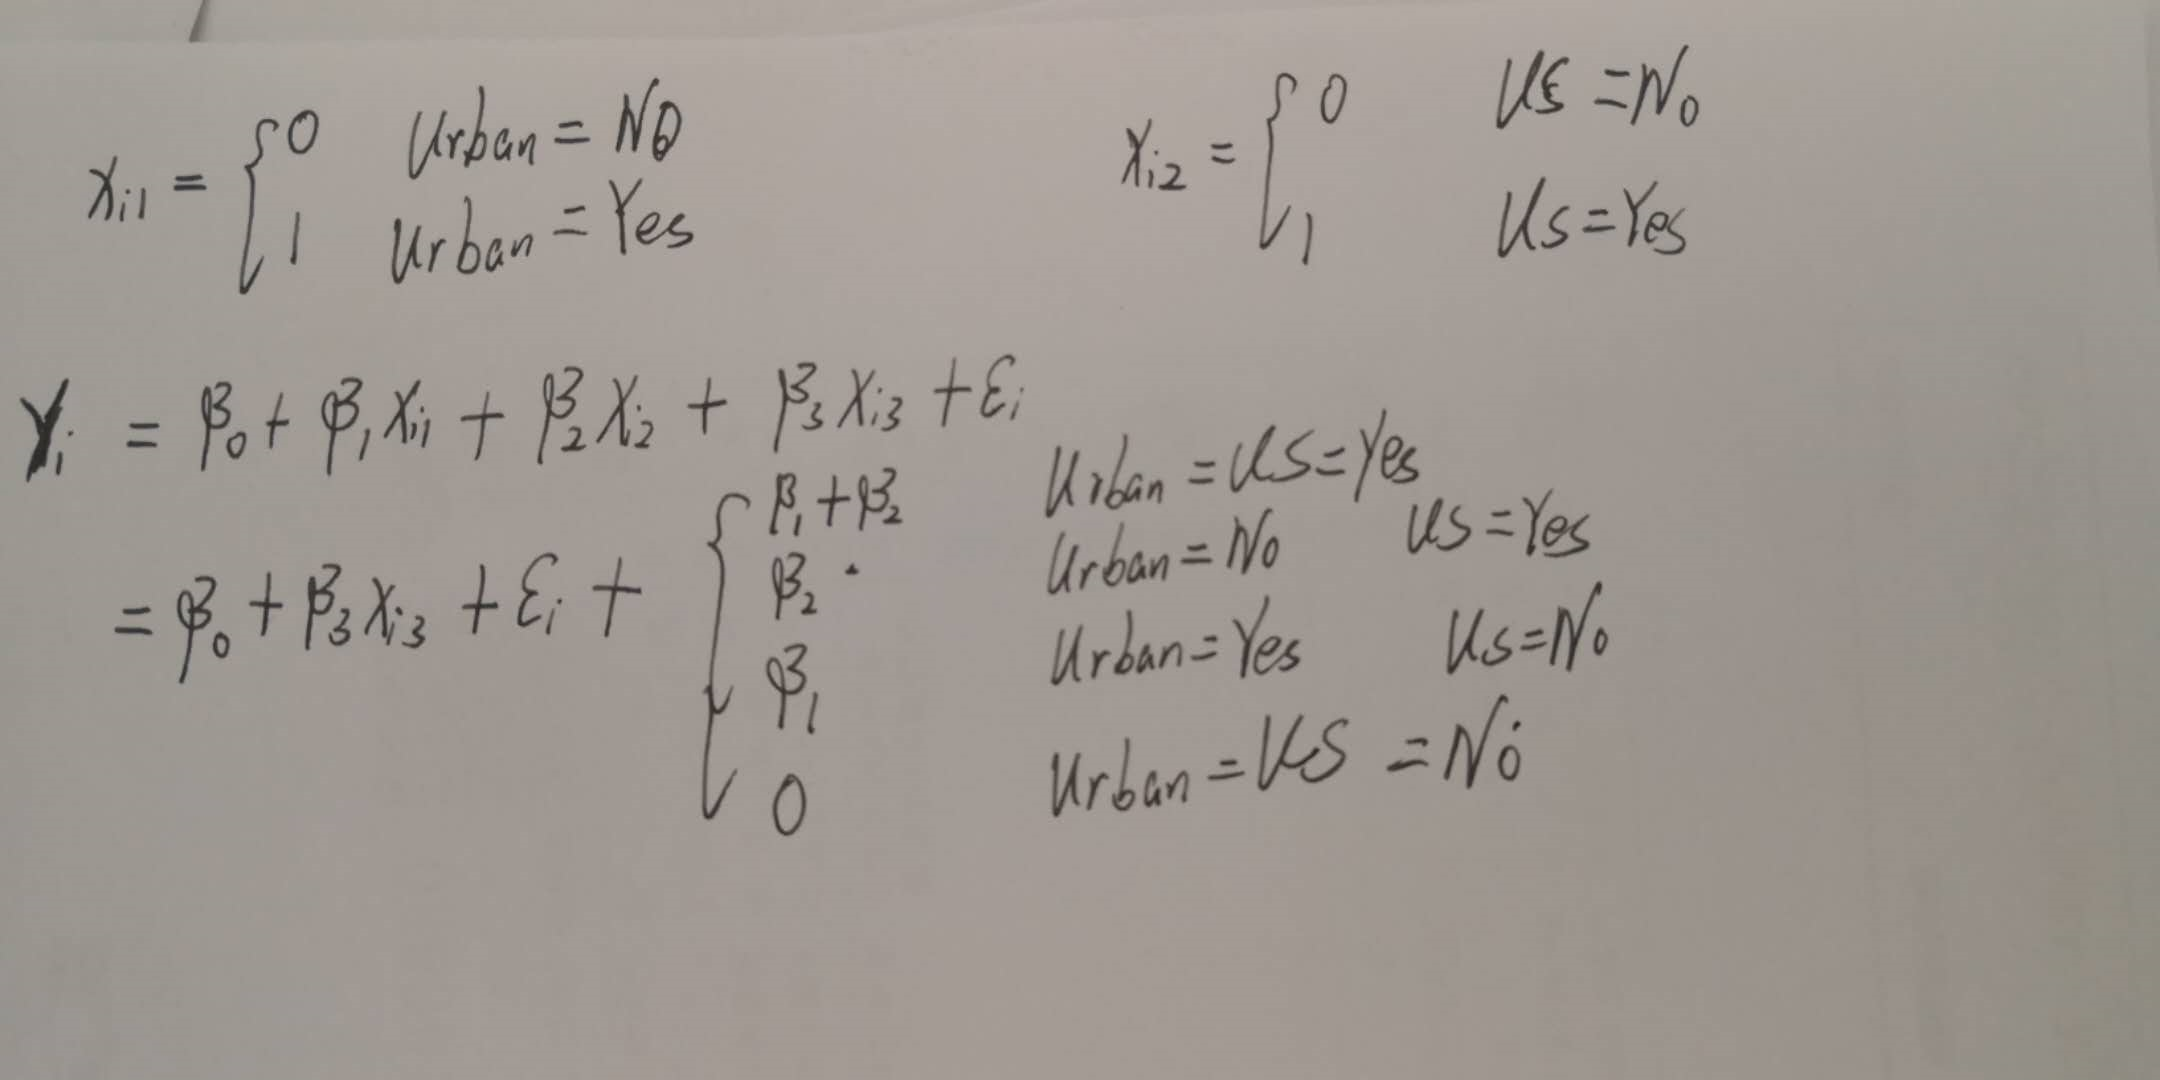

**(d) For which of the predictors can you reject the null hypothesis
H 0 : β j = 0?**

summary()对比可知Urban p值大于0.9无法拒绝0假设

**(e) On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome**

In [7]:
results_Carseats_improve = smf.ols('Sales ~ Price + US',data = Carseats).fit()
results_Carseats_improve.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           2.66e-24
Time:                        22:50:55   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(f) How well do the models in (a) and (e) fit the data?**

In [8]:
print('RSE/mpg_avrage in (a)',results_Carseats_test.mse_resid ** 0.5/Carseats['Sales'].mean())
print('RSE/mpg_avrage in (e)',results_Carseats_improve.mse_resid ** 0.5/Carseats['Sales'].mean())
print('R-squared in (a)',results_Carseats_test.rsquared)
print('R-squared in (e)',results_Carseats_improve.rsquared)

RSE/mpg_avrage in (a) 0.32982727406698137
RSE/mpg_avrage in (e) 0.32941431975994157
R-squared in (a) 0.23927539218405558
R-squared in (e) 0.23926288842678567


可见两者的拟合度都较低，误差百分比均超过了32%且均只解释了24%不到的销售方差

**(g) Using the model from (e), obtain 95% confidence intervals for
the coefficient(s).**

In [9]:
#0.05可缺省，实际summary()已携带该统计
results_Carseats_improve.conf_int(0.05)

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


**(h) Is there evidence of outliers or high leverage observations in the
model from (e)?**

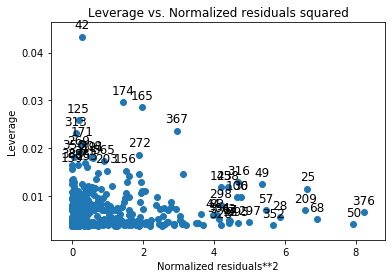

In [10]:
#statsmodels绘制杠杆等级，横轴为方差（代表离散情况），竖轴为杠杆等级
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig = plot_leverage_resid2(results_Carseats_improve)

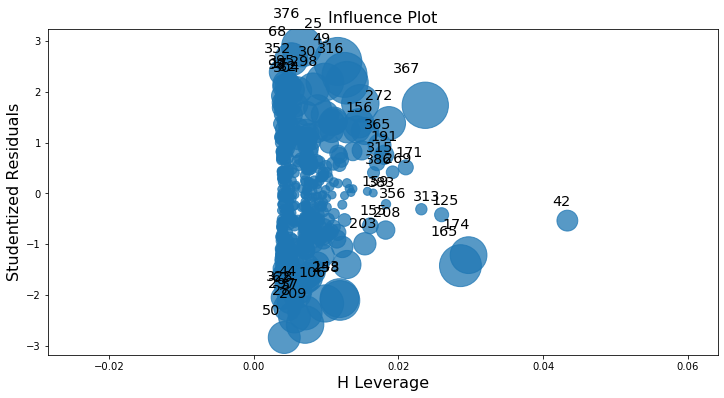

In [11]:
#statsmodels绘制杠杆等级方式2，横轴为杠杆等级，竖轴为学生化残差（代表离散情况）
fig, ax = plt.subplots(figsize=(12,6))
fig = sm.graphics.influence_plot(results_Carseats_improve, ax=ax)

In [12]:
#杠杆点判断
print('(p+1)/n :',(2+1)/len(Carseats))

(p+1)/n : 0.0075


从图示中判断如42杠杆统计量远大于0.0075属于杠杆点，而376学生化残差需判断是否大于3（离散点条件）

In [13]:
#利用OLSInfluence获取杠杆统计量和学生化残差值
from statsmodels.stats.outliers_influence import OLSInfluence
OLSInfluence(results_Carseats_improve).summary_frame().head()

,dfb_Intercept,dfb_US[T.Yes],dfb_Price,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.004685,0.026900,0.004960,0.000705,0.733148,0.003922,0.046002,0.732720,0.045975
1,0.041735,0.025407,-0.044186,0.001145,0.614748,0.009004,0.058597,0.614266,0.058551
2,0.005649,0.003187,-0.005980,0.000020,0.076422,0.009954,0.007663,0.076326,0.007653
3,-0.024934,-0.024827,0.026398,0.000745,-0.627878,0.005636,-0.047272,-0.627399,-0.047236
4,0.000424,0.053707,-0.023159,0.001602,-0.775599,0.007928,-0.069333,-0.775210,-0.069298


In [14]:
(OLSInfluence(results_Carseats_improve).summary_frame().student_resid.abs() > 3).any()

False

In [15]:
(OLSInfluence(results_Carseats_improve).summary_frame().hat_diag > 0.0075 * 3).any()

True

In [16]:
OLSInfluence(results_Carseats_improve).summary_frame().hat_diag[OLSInfluence(results_Carseats_improve).summary_frame().hat_diag > 0.0075 * 3]

42     0.043338
125    0.025966
165    0.028567
174    0.029687
313    0.023165
367    0.023707
Name: hat_diag, dtype: float64

从以上判断无离散点，42、125、165、174、313、367为高杠杆点

In [17]:
#单独获取办法
ol_Carseats_improve = results_Carseats_improve.get_influence()

In [18]:
ol_Carseats_improve.hat_matrix_diag[42]

0.04333765703717885

In [19]:
ol_Carseats_improve.resid_studentized_external[376]

2.8915213186304474

In [20]:
leverage= pd.Series(ol_Carseats_improve.hat_matrix_diag)
leverage[leverage > 0.0075 * 3]

42     0.043338
125    0.025966
165    0.028567
174    0.029687
313    0.023165
367    0.023707
dtype: float64